In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt
%matplotlib notebook
import timeit
import Cluster_Ensembles as CE
from functools import reduce
start_time=timeit.default_timer()

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
results_file = './write/pmbc3k.h5ad'

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


scanpy==1.0.4 anndata==0.6.1 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
path = '/home/ehamilton/ProjectSummer2018/GRCh38/'
leukdata = sc.read(path + 'matrix.mtx', cache=True).T  # transpose the data
leukdata.var_names = pd.read_csv(path + 'genes.tsv', header=None, sep='\t')[1]
leukdata.obs_names = pd.read_csv(path + 'barcodes.tsv', header=None)[0]
print(leukdata.shape)

... reading from cache file ./cache/home-ehamilton-ProjectSummer2018-GRCh38-matrix.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
(6617, 33694)


In [3]:
leukdata.obs

""
0
AAACCTGCAAGTAATG-1
AAACCTGCAAGTCTGT-1
AAACCTGCATCCTAGA-1
AAACCTGGTCCGCTGA-1
AAACCTGGTCGAGATG-1
AAACCTGGTCGCGGTT-1
AAACCTGGTTACGTCA-1
AAACCTGTCACTCCTG-1
AAACCTGTCCAGGGCT-1


In [4]:
print(leukdata.X)

  (0, 18)	1.0
  (0, 33)	4.0
  (0, 59)	2.0
  (0, 86)	1.0
  (0, 97)	1.0
  (0, 101)	2.0
  (0, 110)	1.0
  (0, 153)	17.0
  (0, 188)	4.0
  (0, 194)	1.0
  (0, 197)	4.0
  (0, 219)	1.0
  (0, 223)	1.0
  (0, 238)	1.0
  (0, 305)	1.0
  (0, 337)	1.0
  (0, 375)	1.0
  (0, 404)	1.0
  (0, 406)	2.0
  (0, 408)	4.0
  (0, 436)	1.0
  (0, 440)	1.0
  (0, 457)	1.0
  (0, 484)	53.0
  (0, 488)	2.0
  :	:
  (6616, 33407)	3.0
  (6616, 33410)	3.0
  (6616, 33433)	2.0
  (6616, 33450)	1.0
  (6616, 33480)	6.0
  (6616, 33497)	1.0
  (6616, 33529)	1.0
  (6616, 33551)	1.0
  (6616, 33567)	2.0
  (6616, 33600)	1.0
  (6616, 33606)	1.0
  (6616, 33614)	1.0
  (6616, 33638)	1.0
  (6616, 33652)	11.0
  (6616, 33653)	24.0
  (6616, 33654)	59.0
  (6616, 33655)	55.0
  (6616, 33656)	2.0
  (6616, 33657)	26.0
  (6616, 33658)	64.0
  (6616, 33659)	2.0
  (6616, 33660)	1.0
  (6616, 33661)	38.0
  (6616, 33662)	6.0
  (6616, 33664)	23.0


In [5]:
reduce


<function _functools.reduce>

In [6]:
leukdata.var_names_make_unique()

In [7]:
print(leukdata)

AnnData object with n_obs × n_vars = 6617 × 33694 


In [8]:
sc.pp.filter_cells(leukdata, min_genes=200)
sc.pp.filter_genes(leukdata, min_cells=3)

In [9]:
mito_genes = [name for name in leukdata.var_names if name.startswith('MT-')]
leukdata.obs['percent_mito']=np.sum( leukdata[:, mito_genes].X, axis=1).A1 / np.sum(leukdata.X, axis=1).A1
leukdata.obs['n_counts']= leukdata.X.sum(axis=1).A1

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


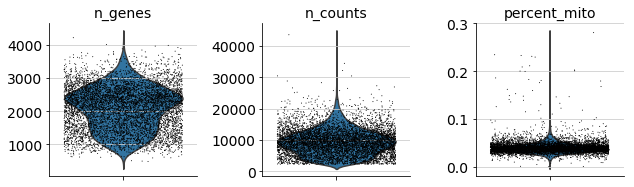

In [10]:
sc.pl.violin(leukdata, ['n_genes','n_counts','percent_mito'], jitter=0.4, multi_panel=True)

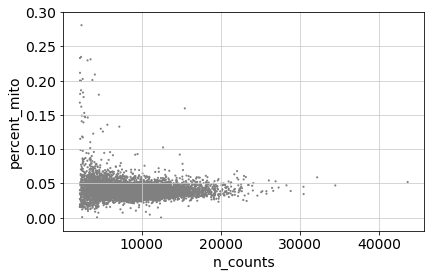

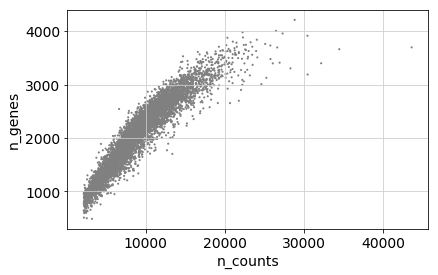

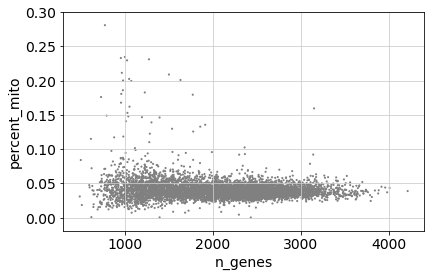

In [11]:
sc.pl.scatter(leukdata, x='n_counts',y='percent_mito')
sc.pl.scatter(leukdata, x='n_counts',y='n_genes')
sc.pl.scatter(leukdata, x='n_genes',y='percent_mito')

In [12]:
leukdata = leukdata[leukdata.obs['n_genes'] < 4000, :]
leukdata = leukdata[leukdata.obs['percent_mito'] < 0.1, :]
print(leukdata.shape)

(6578, 15740)


In [13]:
leukdata.raw = sc.pp.log1p(leukdata, copy=True)

In [14]:
print(leukdata.raw)

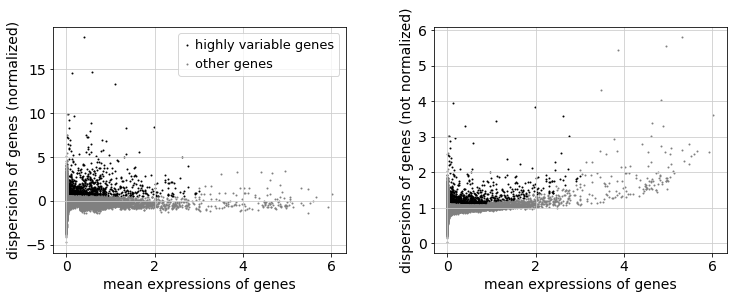

In [15]:
sc.pp.normalize_per_cell(leukdata, counts_per_cell_after=20000)
filter_result = sc.pp.filter_genes_dispersion(leukdata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

In [16]:
leukdata = leukdata[:, filter_result.gene_subset]

In [16]:
print(leukdata)

View of AnnData object with n_obs × n_vars = 6578 × 1864 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'


In [17]:
sc.pp.log1p(leukdata)

In [18]:
sc.pp.regress_out(leukdata, ['n_counts','percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:09.96)


In [19]:
sc.pp.scale(leukdata, max_value=10)

In [20]:
leukdata.write(results_file)

In [21]:
print(leukdata)

AnnData object with n_obs × n_vars = 6578 × 1864 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'


In [4]:
sc.tl.pca(leukdata)

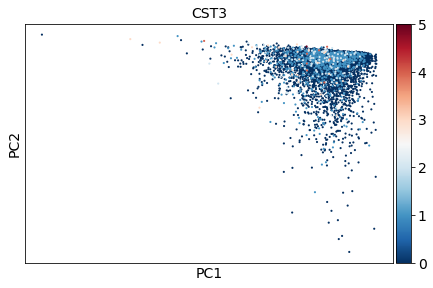

In [5]:
leukdata.obsm['X_pca'] *=-1
sc.pl.pca_scatter(leukdata, color='CST3')

In [ ]:
leukdata=sc.read(results_file)

In [24]:
sc.tl.tsne(leukdata, random_state=2, n_pcs=10)
leukdata.write(results_file)

computing tSNE
         Falling back to preprocessing with `sc.pp.pca` and default params.
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:33.57) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


In [25]:
import MulticoreTSNE

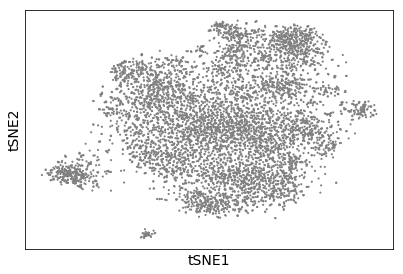

In [26]:
sc.pl.tsne(leukdata)

In [27]:
leukdata=sc.read(results_file)

In [28]:
leukdata.obs
leukdata.var

,n_cells
index,
RP11-206L10.9,103
LINC00115,125
ISG15,4403
RP5-832C2.5,142
TNFRSF14,2423
NPHP4,80
VAMP3,417
RERE,1220
PIK3CD-AS1,115


In [29]:
sc.pp.neighbors(leukdata, n_neighbors=10)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:06.67) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [30]:
sc.tl.louvain(leukdata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.89) --> found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [31]:
sc.tl.umap(leukdata)

computing UMAP
    finished (0:00:17.01) --> added
    'X_umap', UMAP coordinates (adata.obsm)


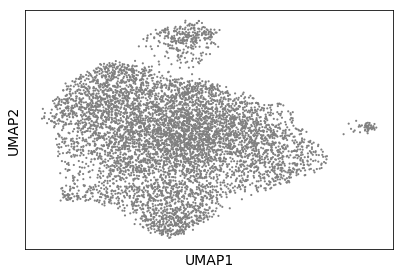

In [32]:
sc.pl.umap(leukdata, use_raw=False)

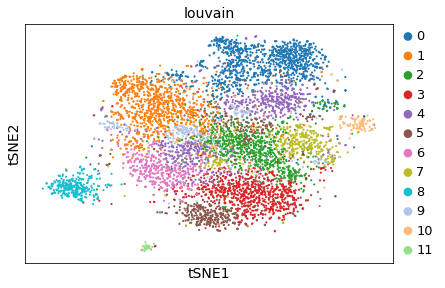

In [33]:
sc.pl.tsne(leukdata, color='louvain')

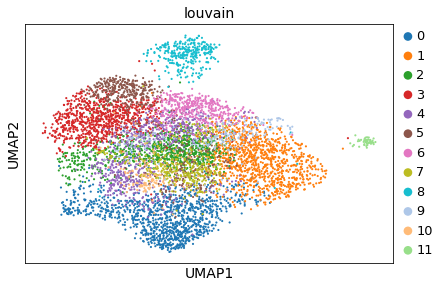

In [34]:
sc.pl.umap(leukdata, color='louvain')

In [35]:
leukdata.X

array([[ 9.00642300e+00, -1.25931472e-01,  1.34629798e+00, ...,
         2.40598433e-03, -1.08967572e-01, -1.95543721e-01],
       [-1.19915567e-01, -1.24270760e-01,  6.12227917e-01, ...,
         7.71606445e-01, -1.10616207e-01, -2.02368826e-01],
       [-1.18878797e-01, -1.11626096e-01,  8.32103312e-01, ...,
         1.22486651e+00, -1.02887854e-01, -1.71325907e-01],
       ...,
       [-1.18837461e-01, -1.07882977e-01, -1.21877444e+00, ...,
         4.65627521e-01, -1.01250820e-01, -1.64799914e-01],
       [-1.19560219e-01, -1.28606871e-01,  6.03895448e-02, ...,
         1.22783446e+00, -1.11524545e-01, -2.05884680e-01],
       [-1.19650446e-01, -1.28905982e-01, -1.24658954e+00, ...,
        -1.60052323e+00, -1.11868344e-01, -2.07277924e-01]], dtype=float32)

In [36]:
sc.tl.louvain(leukdata, resolution=0.30)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.86) --> found 5 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


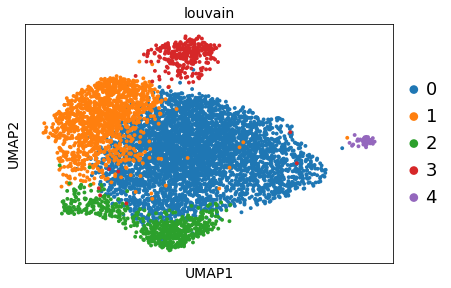

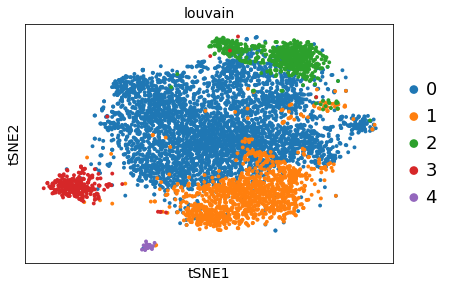

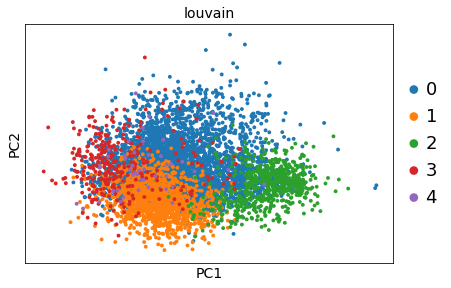

In [37]:
sc.pl.umap(leukdata, color='louvain',size = 60, legend_fontsize = 18)
sc.pl.tsne(leukdata, color='louvain',    size = 60, legend_fontsize = 18)
sc.pl.pca_scatter(leukdata, color='louvain', size = 60, legend_fontsize = 18)

ranking genes
    finished (0:00:02.52) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids


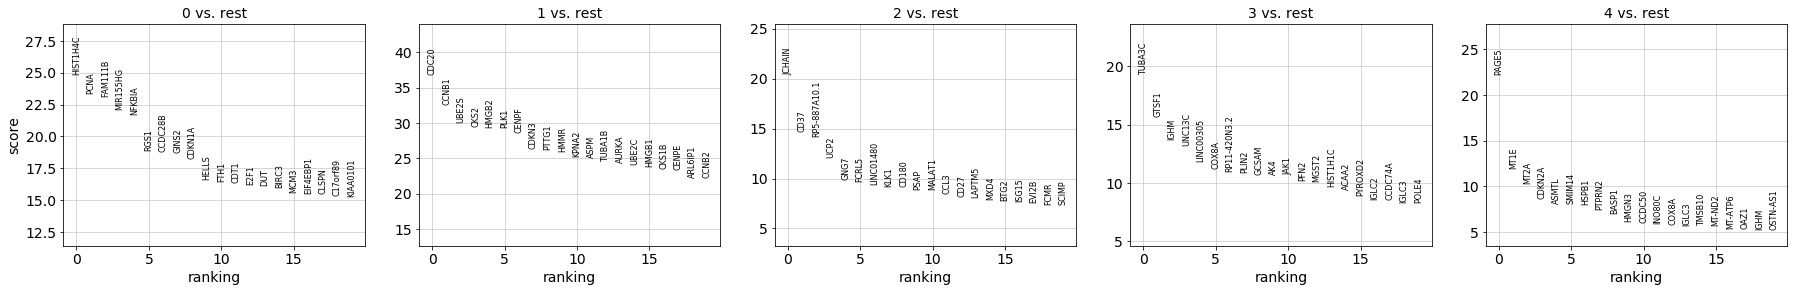

In [38]:
sc.tl.rank_genes_groups(leukdata, 'louvain')
sc.pl.rank_genes_groups(leukdata, n_genes=20,)
leukdata.write(results_file)

In [39]:
leukdata.obs['louvain'].cat.categories = ['HIST1H4C','CDC20','JCHAIN','TUBA3C','PAGE5']

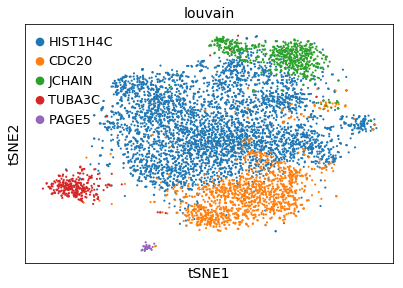

Text(0.5,1,'Leukemia Clusters tSNE Basis')

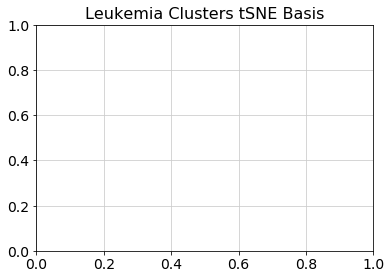

In [40]:
sc.pl.tsne(leukdata, color='louvain', legend_loc='best',)
plt.title('Leukemia Clusters tSNE Basis', fontsize=16)

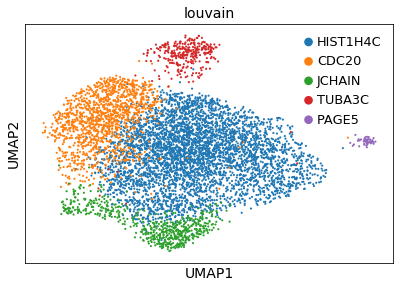

Text(0.5,1,'Leukemia Clusters UMAP Basis')

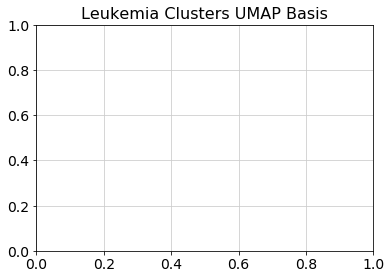

In [41]:
sc.pl.umap(leukdata, color='louvain', legend_loc='best')
plt.title('Leukemia Clusters UMAP Basis', fontsize=16)

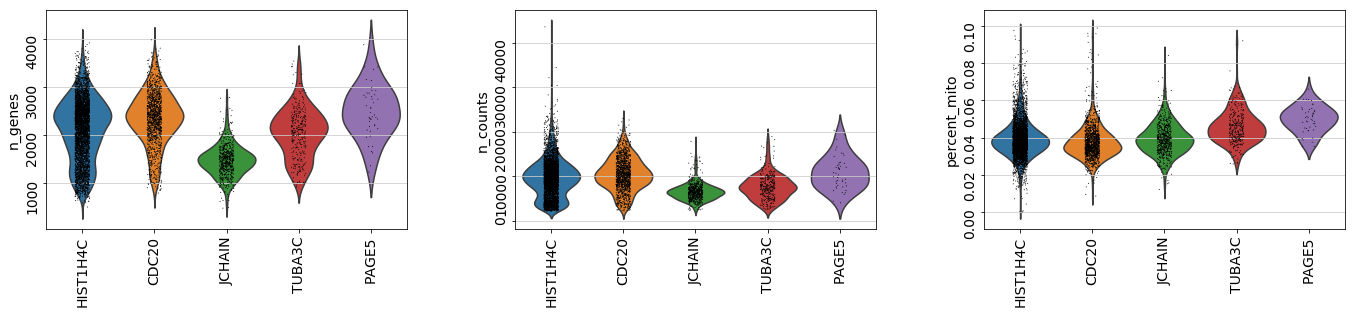

Text(0.5,1,'Leukemia Clusters Violin Plot')

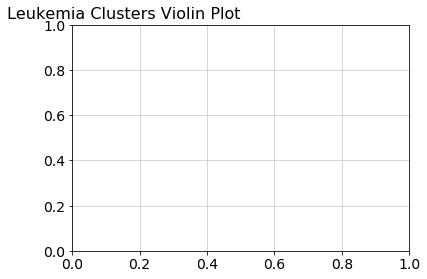

In [42]:
sc.pl.violin(leukdata, ['n_genes','n_counts','percent_mito'], groupby='louvain', rotation=90)
plt.title('Leukemia Clusters Violin Plot', fontsize=16, horizontalalignment='right', )

In [43]:
leukdata_louvain=pd.DataFrame(leukdata.uns['rank_genes_groups']['names']).head(50)
leukdata_louvain

,0,1,2,3,4
0,HIST1H4C,CDC20,JCHAIN,TUBA3C,PAGE5
1,PCNA,CCNB1,CD37,GTSF1,MT1E
2,FAM111B,UBE2S,RP5-887A10.1,IGHM,MT2A
3,MIR155HG,CKS2,UCP2,UNC13C,CDKN2A
4,NFKBIA,HMGB2,GNG7,LINC00305,ASMTL
5,RGS1,PLK1,FCRL5,COX8A,SMIM14
6,CCDC28B,CENPF,LINC01480,RP11-420N3.2,HSPB1
7,GINS2,CDKN3,KLK1,PLIN2,PTPRN2
8,CDKN1A,PTTG1,CD180,GCSAM,BASP1
9,HELLS,HMMR,PSAP,AK4,HMGN3


In [44]:
result = leukdata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names','scores']}).head(5)

,0_n,0_s,1_n,1_s,2_n,2_s,3_n,3_s,4_n,4_s
0,HIST1H4C,24.812811,CDC20,36.760994,JCHAIN,20.349102,TUBA3C,19.241562,PAGE5,22.154491
1,PCNA,23.334738,CCNB1,32.555576,CD37,14.635160,GTSF1,15.670452,MT1E,11.924020
2,FAM111B,23.128685,UBE2S,30.046698,RP5-887A10.1,14.155959,IGHM,13.657947,MT2A,10.264286
3,MIR155HG,22.093727,CKS2,29.465824,UCP2,12.107818,UNC13C,13.200793,CDKN2A,8.608112
4,NFKBIA,21.661369,HMGB2,29.349310,GNG7,9.855290,LINC00305,11.768323,ASMTL,8.132725


ranking genes
    finished (0:00:00.54) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids


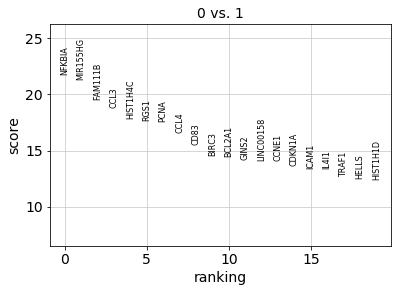

In [45]:
leukdata = sc.read(results_file)
sc.tl.rank_genes_groups(leukdata, 'louvain', groups=['0'], reference='1')
sc.pl.rank_genes_groups(leukdata, groups=['0'], n_genes=20)

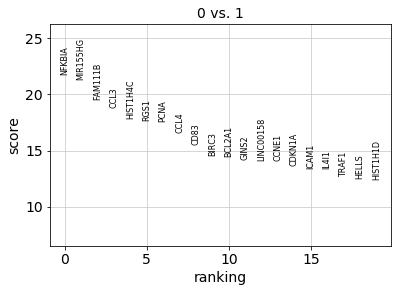

,0
0,NFKBIA
1,MIR155HG
2,FAM111B
3,CCL3
4,HIST1H4C
5,RGS1
6,PCNA
7,CCL4
8,CD83
9,BIRC3


In [46]:
sc.pl.rank_genes_groups(leukdata, n_genes=20)
pd.DataFrame(leukdata.uns['rank_genes_groups']['names']).head(50)

In [47]:
result = leukdata.uns['rank_genes_groups']
groups = result['names'].dtype.names
biomarkers = pd.DataFrame({group + '_' + key[:1]: result[key][group]
   for group in groups for key in ['names', 'scores']}).head(20)
result = leukdata.uns['rank_genes_groups']
groups = result['names'].dtype.names
biomarkers = pd.DataFrame({group + '_' + key[:1]: result[key][group]
   for group in groups for key in ['names', 'scores']}).head(20)

In [48]:
leukdata.obs

,n_genes,percent_mito,n_counts,louvain
index,,,,
AAACCTGCAAGTAATG-1,1359,0.040047,6742.0,0
AAACCTGCAAGTCTGT-1,1915,0.045527,8193.0,0
AAACCTGCATCCTAGA-1,1608,0.055618,6221.0,0
AAACCTGGTCCGCTGA-1,1025,0.026316,3382.0,3
AAACCTGGTCGAGATG-1,2104,0.023848,7506.0,1
AAACCTGGTCGCGGTT-1,3067,0.042044,15793.0,1
AAACCTGGTTACGTCA-1,2490,0.046813,10040.0,3
AAACCTGTCACTCCTG-1,3206,0.036937,17029.0,1
AAACCTGTCCAGGGCT-1,767,0.027322,2196.0,0


In [49]:
outpath= '/home/ehamilton/ProjectSummer2018/GRCh38/'
outfile = outpath + 'OBS123123.csv'
leukdata.obs.to_csv(outfile, sep='\t')

In [50]:
leukdata.obs.sort_values('louvain')

,n_genes,percent_mito,n_counts,louvain
index,,,,
AAACCTGCAAGTAATG-1,1359,0.040047,6742.0,0
GCACTCTTCGTGGACC-1,908,0.060224,2773.0,0
GCACTCTTCCCAGGTG-1,2011,0.050155,10348.0,0
GCACTCTTCACAGTAC-1,2267,0.027238,10500.0,0
GCACTCTGTGAACCTT-1,2073,0.036861,8410.0,0
GCACTCTCATCCGGGT-1,1678,0.060177,5434.0,0
GCACTCTCACGACGAA-1,2108,0.040513,8491.0,0
GCACTCTCAATGGTCT-1,2283,0.035963,9760.0,0
GCACTCTTCTTGTTTG-1,3238,0.028961,16367.0,0


In [51]:
cell_cycle_genes = [x.strip() for x in open('/home/ehamilton/ProjectSummer2018/GRCh38/regev_lab_cell_cycle_genes.txt')]

In [52]:
s_genes = cell_cycle_genes[:43]

In [53]:
g2m_genes = cell_cycle_genes[43:]

In [54]:
cell_cycle_genes = [x for x in cell_cycle_genes if x in leukdata.var_names]

In [55]:
sc.tl.score_genes_cell_cycle(leukdata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished (0:00:00.57) --> added
    'S_score', score of gene set (adata.obs)
computing score 'G2M_score'
    finished (0:00:00.54) --> added
    'G2M_score', score of gene set (adata.obs)
-->     'phase', cell cycle phase (adata.obs)


In [56]:
cell_cycle_genes = [x.strip() for x in open('/home/ehamilton/ProjectSummer2018/GRCh38/regev_lab_cell_cycle_genes.txt')]

In [57]:
s_genes = cell_cycle_genes[:43]

In [58]:
g2m_genes = cell_cycle_genes[43:]

In [59]:
cell_cycle_genes = [x for x in cell_cycle_genes if x in leukdata.var_names]

In [60]:
sc.tl.score_genes_cell_cycle(leukdata, s_genes, g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished (0:00:00.54) --> added
    'S_score', score of gene set (adata.obs)
computing score 'G2M_score'
    finished (0:00:01.06) --> added
    'G2M_score', score of gene set (adata.obs)
-->     'phase', cell cycle phase (adata.obs)


In [61]:
leukdata.var.shape

(1864, 1)

computing UMAP
    finished (0:00:21.85) --> added
    'X_umap', UMAP coordinates (adata.obsm)
... storing 'phase' as categorical


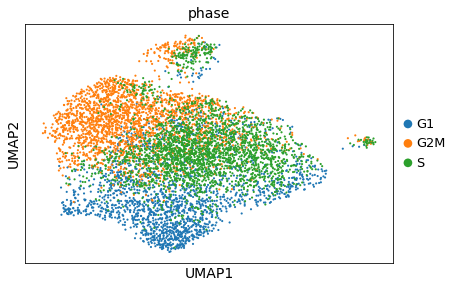

In [62]:
leukdata_cc_genes = leukdata[:, cell_cycle_genes]
sc.tl.umap(leukdata_cc_genes)
sc.pl.umap(leukdata_cc_genes, color='phase')

ranking genes
    finished (0:00:02.11) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids


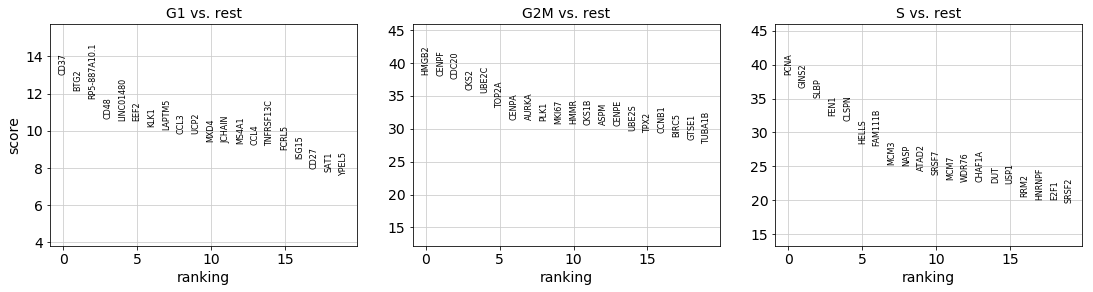

In [63]:
sc.tl.rank_genes_groups(leukdata_cc_genes, 'phase')
sc.pl.rank_genes_groups(leukdata_cc_genes, n_genes=20,)
leukdata_cc_genes.write(results_file)

In [64]:
leukdata_phase = pd.DataFrame(leukdata_cc_genes.uns['rank_genes_groups']['names']).head(50)

In [65]:
set(leukdata_louvain['0']).intersection(leukdata_phase['G1']),set(leukdata_louvain['0']).intersection(leukdata_phase['G2M']),set(leukdata_louvain['0']).intersection(leukdata_phase['S']),

(set(),
 set(),
 {'CCNE1',
  'CDT1',
  'CLSPN',
  'DCTPP1',
  'DEK',
  'DUT',
  'E2F1',
  'FAM111B',
  'FEN1',
  'GINS2',
  'HELLS',
  'HIST1H4C',
  'MCM3',
  'MCM4',
  'MCM7',
  'PCNA',
  'SLBP',
  'SRSF2',
  'TK1',
  'WDR76'})

In [66]:
len(set(leukdata_louvain['0']).intersection(leukdata_phase['G1'])),len(set(leukdata_louvain['0']).intersection(leukdata_phase['G2M'])),len(set(leukdata_louvain['0']).intersection(leukdata_phase['S']))

(0, 0, 20)

In [67]:
set(leukdata_louvain['2']).intersection(leukdata_phase['G1']),set(leukdata_louvain['1']).intersection(leukdata_phase['G2M']),set(leukdata_louvain['1']).intersection(leukdata_phase['S']),

({'AC079630.4',
  'AICDA',
  'BTG2',
  'CCL3',
  'CCL4',
  'CD180',
  'CD27',
  'CD37',
  'CD48',
  'EPSTI1',
  'FCMR',
  'FCRL5',
  'GNG7',
  'ISG15',
  'ITM2B',
  'JCHAIN',
  'KLK1',
  'LAPTM5',
  'LINC01480',
  'LY9',
  'MS4A1',
  'MXD4',
  'PSAP',
  'RAB30',
  'RP5-887A10.1',
  'SCIMP',
  'TMEM140',
  'TMEM150A',
  'TNFRSF13C',
  'UCP2',
  'YPEL5'},
 {'ARL6IP1',
  'ASPM',
  'AURKA',
  'BIRC5',
  'CCNB1',
  'CCNB2',
  'CDC20',
  'CDCA3',
  'CDKN3',
  'CENPA',
  'CENPE',
  'CENPF',
  'CKS1B',
  'CKS2',
  'DLGAP5',
  'GTSE1',
  'H2AFX',
  'H2AFZ',
  'HMGB1',
  'HMGB2',
  'HMGN2',
  'HMMR',
  'HN1',
  'KPNA2',
  'MKI67',
  'NUSAP1',
  'PHF19',
  'PIF1',
  'PLK1',
  'PTTG1',
  'RNF26',
  'SGOL2',
  'SMC4',
  'STMN1',
  'TOP2A',
  'TPX2',
  'TUBA1B',
  'TUBA1C',
  'TUBB',
  'TUBB4B',
  'UBE2C',
  'UBE2S'},
 {'H2AFZ'})

In [68]:
len(set(leukdata_louvain['1']).intersection(leukdata_phase['G1'])),len(set(leukdata_louvain['1']).intersection(leukdata_phase['G2M'])),len(set(leukdata_louvain['1']).intersection(leukdata_phase['S']))

(0, 42, 1)

In [69]:
set(leukdata_louvain['2']).intersection(leukdata_phase['G1']),set(leukdata_louvain['2']).intersection(leukdata_phase['G2M']),set(leukdata_louvain['2']).intersection(leukdata_phase['S']),

({'AC079630.4',
  'AICDA',
  'BTG2',
  'CCL3',
  'CCL4',
  'CD180',
  'CD27',
  'CD37',
  'CD48',
  'EPSTI1',
  'FCMR',
  'FCRL5',
  'GNG7',
  'ISG15',
  'ITM2B',
  'JCHAIN',
  'KLK1',
  'LAPTM5',
  'LINC01480',
  'LY9',
  'MS4A1',
  'MXD4',
  'PSAP',
  'RAB30',
  'RP5-887A10.1',
  'SCIMP',
  'TMEM140',
  'TMEM150A',
  'TNFRSF13C',
  'UCP2',
  'YPEL5'},
 set(),
 set())

In [70]:
len(set(leukdata_louvain['2']).intersection(leukdata_phase['G1'])),len(set(leukdata_louvain['2']).intersection(leukdata_phase['G2M'])),len(set(leukdata_louvain['2']).intersection(leukdata_phase['S']))

(31, 0, 0)

In [71]:
set(leukdata_louvain['3']).intersection(leukdata_phase['G1']),set(leukdata_louvain['3']).intersection(leukdata_phase['G2M']),set(leukdata_louvain['3']).intersection(leukdata_phase['S']),

(set(), {'STMN1'}, set())

In [72]:
len(set(leukdata_louvain['3']).intersection(leukdata_phase['G1'])),len(set(leukdata_louvain['3']).intersection(leukdata_phase['G2M'])),len(set(leukdata_louvain['3']).intersection(leukdata_phase['S']))

(0, 1, 0)

In [73]:
set(leukdata_louvain['4']).intersection(leukdata_phase['G1']),set(leukdata_louvain['4']).intersection(leukdata_phase['G2M']),set(leukdata_louvain['4']).intersection(leukdata_phase['S']),

(set(), set(), set())

In [74]:
len(set(leukdata_louvain['4']).intersection(leukdata_phase['G1'])),len(set(leukdata_louvain['4']).intersection(leukdata_phase['G2M'])),len(set(leukdata_louvain['4']).intersection(leukdata_phase['S']))

(0, 0, 0)

In [75]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [76]:
N=5
ind = np.arange(N)

In [77]:
Cluster1 = (0, 0, 30, 0, 0)
Cluster2 = (1, 43, 0, 1, 0)
Cluster3 = (23, 2, 0, 0, 0)


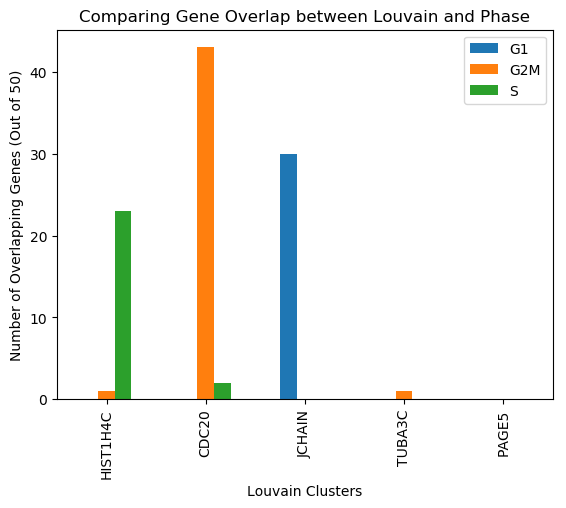

In [78]:
df=pd.DataFrame({'G1':Cluster1, 'G2M':Cluster2, 'S':Cluster3})
df.plot(kind='bar', stacked=False)
plt.ylabel('Number of Overlapping Genes (Out of 50)')
plt.xlabel('Louvain Clusters')
plt.title('Comparing Gene Overlap between Louvain and Phase')
plt.xticks(ind, ('HIST1H4C', 'CDC20', 'JCHAIN', 'TUBA3C', 'PAGE5'))
plt.legend(loc='best')
plt.show()

In [79]:
sc.pp.regress_out(leukdata, ['S_score', 'G2M_score'])
sc.pp.scale(leukdata)

regressing out ['S_score', 'G2M_score']
    finished (0:00:13.03)


In [80]:
leukdata_cc_genes = leukdata[:, cell_cycle_genes]
sc.tl.pca(leukdata_cc_genes)

... storing 'phase' as categorical


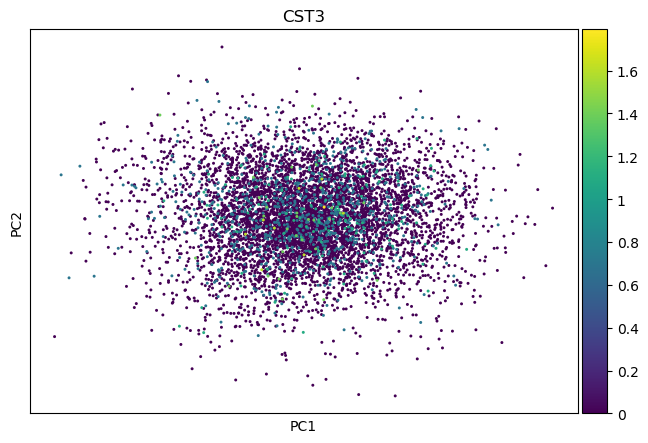

In [81]:
leukdata_cc_genes.obsm['X_pca'] *=-1
sc.pl.pca_scatter(leukdata_cc_genes, color='CST3')

In [82]:
sc.tl.tsne(leukdata_cc_genes, random_state=2, n_pcs=10)
leukdata_cc_genes.write(results_file)

computing tSNE
    using data matrix X directly
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:39.11) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


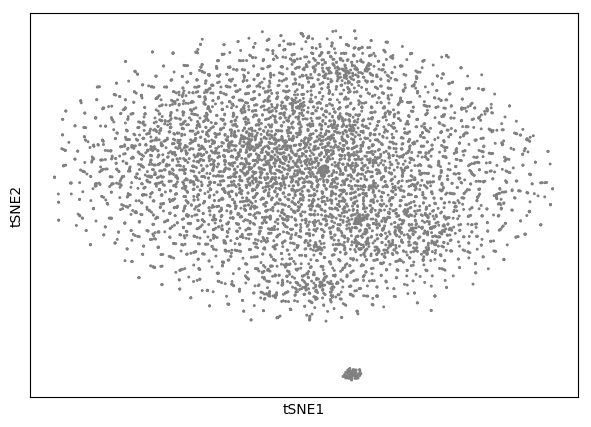

In [83]:
sc.pl.tsne(leukdata_cc_genes)

In [84]:
sc.pp.neighbors(leukdata_cc_genes, n_neighbors=10)

computing neighbors
    initialized `.distances` `.connectivities` 
    using data matrix X directly
    finished (0:00:01.77) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [85]:
sc.tl.louvain(leukdata_cc_genes)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01.16) --> found 15 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [86]:
sc.tl.umap(leukdata_cc_genes)

computing UMAP
    finished (0:00:18.53) --> added
    'X_umap', UMAP coordinates (adata.obsm)


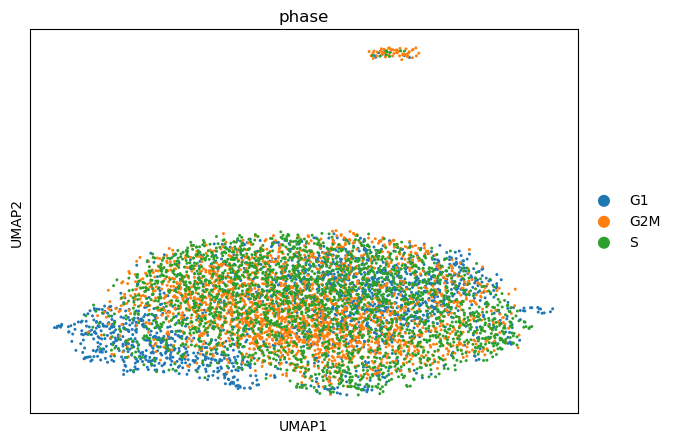

In [87]:
sc.pl.umap(leukdata_cc_genes, color='phase')

In [88]:
leukdata.obs

,n_genes,percent_mito,n_counts,louvain,S_score,G2M_score,phase
index,,,,,,,
AAACCTGCAAGTAATG-1,1359,0.040047,6742.0,0,-0.538878,-0.506792,G1
AAACCTGCAAGTCTGT-1,1915,0.045527,8193.0,0,-0.207754,-0.751782,G1
AAACCTGCATCCTAGA-1,1608,0.055618,6221.0,0,-0.004833,-0.123295,G1
AAACCTGGTCCGCTGA-1,1025,0.026316,3382.0,3,0.312431,-0.294025,S
AAACCTGGTCGAGATG-1,2104,0.023848,7506.0,1,-0.110085,0.685994,G2M
AAACCTGGTCGCGGTT-1,3067,0.042044,15793.0,1,-0.358285,0.579312,G2M
AAACCTGGTTACGTCA-1,2490,0.046813,10040.0,3,0.054419,1.187486,G2M
AAACCTGTCACTCCTG-1,3206,0.036937,17029.0,1,-0.014642,0.339794,G2M
AAACCTGTCCAGGGCT-1,767,0.027322,2196.0,0,0.108344,0.026241,S
